## 前処理

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [9]:
#データ読み込み
df = pd.read_csv("../../data/train.csv").drop('Unnamed: 0', axis=1).dropna()
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [8]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [17]:
#データ分割
business = df.query('Class == "Business"')
eco= df.query('Class == "Eco"')
eco_plus = df.query(' Class == "Eco Plus"')

In [18]:
#データ数削減
eco_new = eco.sample(n=11500, random_state=42)
business_new = business.sample(n=11500, random_state=42)

In [19]:
#データの結合
df_new = pd.concat([eco_new, business_new, eco_plus], axis=0)

In [20]:
#クラスの割合を確認
df_new['Class'].value_counts()

Class
Eco         11500
Business    11500
Eco Plus     7468
Name: count, dtype: int64

In [38]:
#one-hot-encording
business_new_enc = pd.get_dummies(business_new, dtype=int, drop_first=True)

## 特徴量選択

In [21]:
#アンケートの満足度以外の特徴量
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [33]:
#businessから特徴量を絞ったデータ
business_new_feat = business_new[features]

In [34]:
#One-hot-encoding
business_new_feat_enc = pd.get_dummies(business_new_feat, dtype=int, drop_first=True)

In [35]:
business_new_feat_enc

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
43792,26,534,0,1.0,0,1,0
98972,61,2784,56,79.0,1,0,0
19749,19,678,0,0.0,0,0,0
93709,33,404,0,0.0,1,1,0
43500,61,296,69,88.0,1,0,0
...,...,...,...,...,...,...,...
90440,22,1571,0,0.0,0,0,0
50718,56,1608,0,1.0,1,0,0
5860,36,3724,7,11.0,0,0,0
59459,21,3470,18,10.0,1,0,0


## t-SNE

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [36]:
ss = StandardScaler()
business_new_feat_enc_ss = ss.fit_transform(business_new_feat_enc)

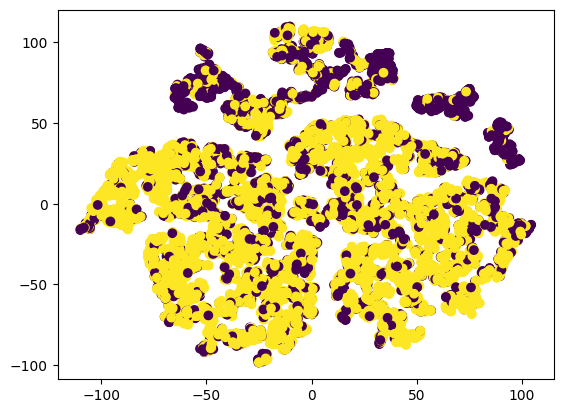

In [42]:
tsne = TSNE(n_components=2, perplexity=20)
y = tsne.fit_transform(business_new_feat_enc_ss)
plt.scatter(y[:,0], y[:,1], c=business_new_enc.satisfaction_satisfied)
plt.show()

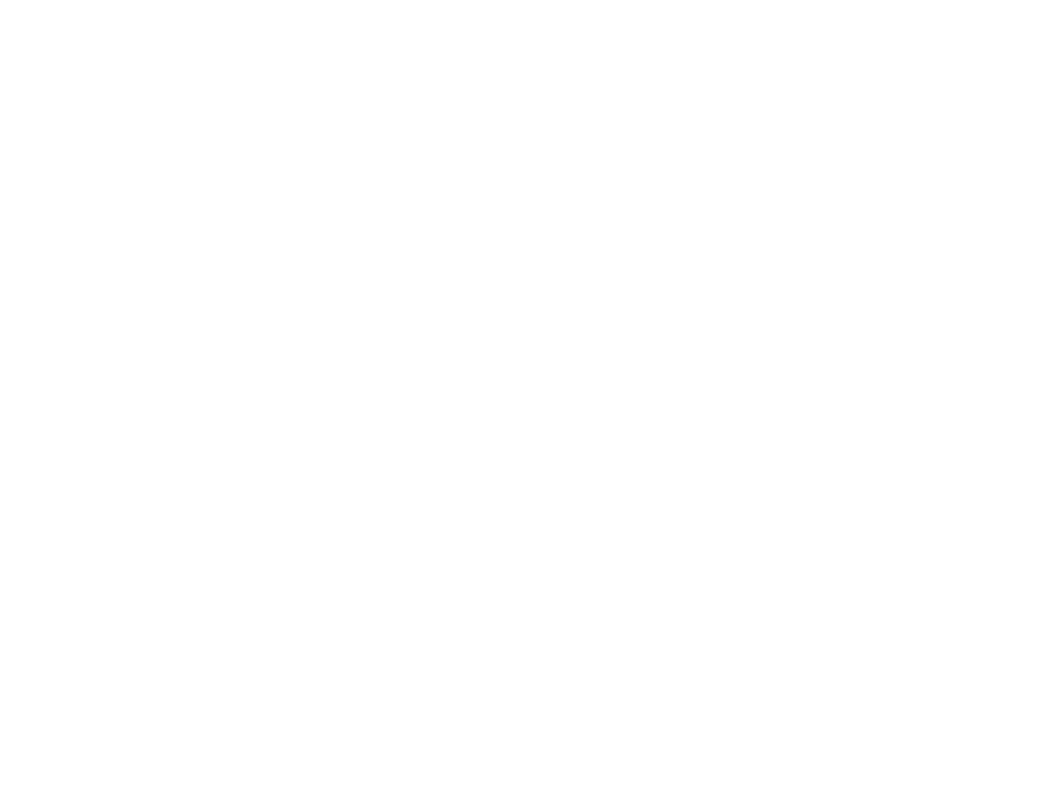

In [45]:
import plotly.graph_objects as go

tsne = TSNE(n_components=3, perplexity=20)
business_3d = tsne.fit_transform(business_new_feat_enc_ss)

x = business_3d[:, 0]
y = business_3d[:, 1]
z = business_3d[:, 2]
c = business_new_enc.satisfaction_satisfied

# 3D散布図の作成
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(color=c, colorscale='Viridis', size=3))])

# グラフのレイアウト設定
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))
# グラフのレイアウト設定（幅と高さの指定）
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    width=800,  # 幅の設定（ピクセル単位）
    height=800  # 高さの設定（ピクセル単位）
)

# グラフの表示
fig.show()